# Problem 1
- Import the complete dataset “train.csv” in Jupyter : houseData = pd.read_csv('train.csv')
- Use the following Numeric variables from the dataset in this problem : GrLivArea and SalePrice
- 1a) Plot SalePrice against GrLivArea using any appropriate bivariate plot to note the strong linear relationship.

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
houseData = pd.read_csv('train.csv')
GrLivArea = pd.DataFrame(houseData['GrLivArea'])
SalePrice = pd.DataFrame(houseData['SalePrice'])

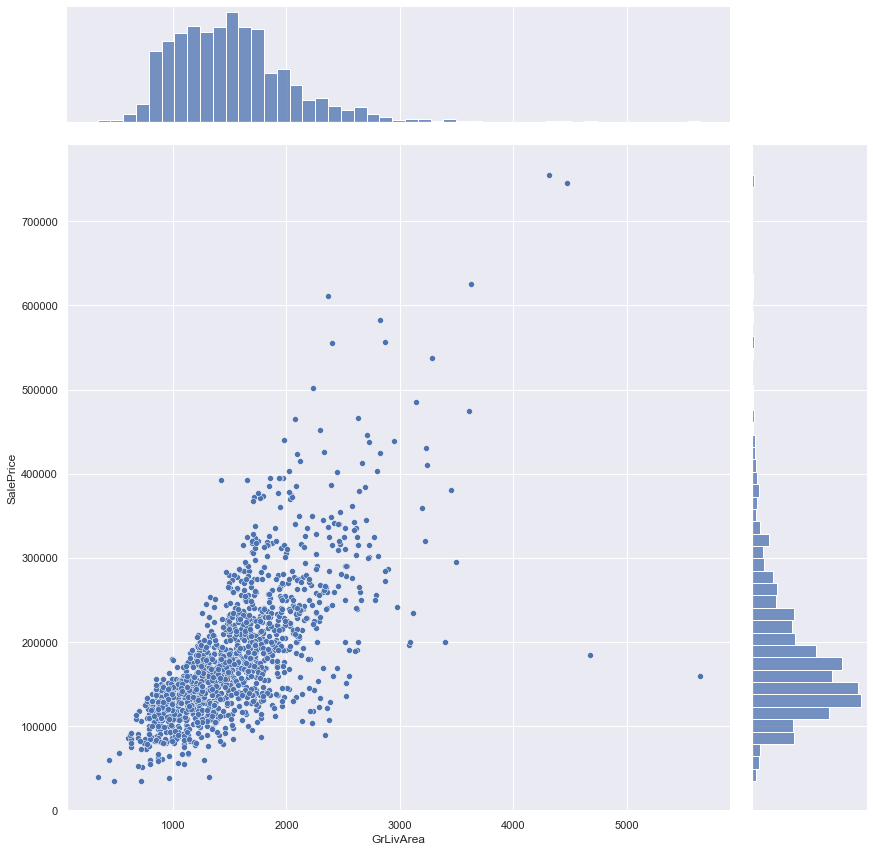

In [4]:
# Create a joint dataframe by concatenating the two variables
jointDF = pd.concat([GrLivArea, SalePrice], axis = 1).reindex(GrLivArea.index)
sb.jointplot(data = jointDF, x = "GrLivArea", y = "SalePrice", height = 12)

#### 1b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

In [5]:
jointDF.corr()

,GrLivArea,SalePrice
GrLivArea,1.000000,0.708624
SalePrice,0.708624,1.000000


#### 1c) Import Linear Regression model from Scikit-Learn : from sklearn.linear_model import LinearRegression

In [6]:
# Import LinearRegression model from Scikit-Learn
from sklearn.linear_model import LinearRegression
# Create a Linear Regression object for SalePrice against GrLivArea
linreg_sp_gla = LinearRegression()

#### 1d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [7]:
# Train Set : 1100 samples
GrLivArea_train = pd.DataFrame(GrLivArea[:1100])
SalePrice_train = pd.DataFrame(SalePrice[:1100])

# Test Set : 360 samples
GrLivArea_test = pd.DataFrame(GrLivArea[-360:])
SalePrice_test = pd.DataFrame(SalePrice[-360:])

# Check the sample sizes
print("Train Set :", GrLivArea_train.shape, SalePrice_train.shape)
print("Test Set  :", GrLivArea_test.shape, SalePrice_test.shape)


Train Set : (1100, 1) (1100, 1)
Test Set  : (360, 1) (360, 1)


#### 1e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using GrLivArea.

In [8]:
# Train the Linear Regression model
linreg_sp_gla.fit(GrLivArea_train, SalePrice_train)

LinearRegression()

#### 1f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot.

In [9]:
# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg_sp_gla.intercept_)
print('Coefficients \t: a = ', linreg_sp_gla.coef_)

Intercept 	: b =  [9498.33463562]
Coefficients 	: a =  [[113.88950443]]


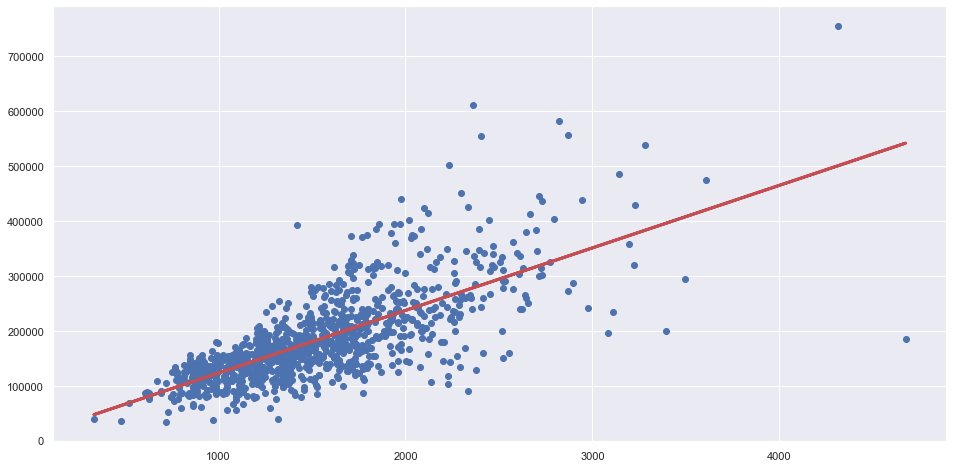

In [10]:
# Formula for the Regression line
regline_x = GrLivArea_train
regline_y = linreg_sp_gla.intercept_ + linreg_sp_gla.coef_ * GrLivArea_train

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_train, SalePrice_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

#### 1g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model

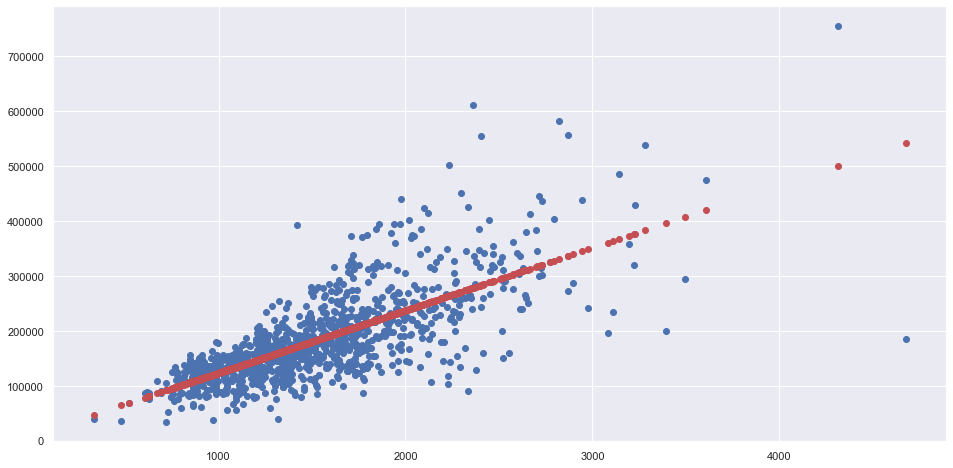

Explained Variance (R^2) 	: 0.5317704755454566
Mean Squared Error (MSE) 	: 2962940662.7214036
Root Mean Squared Error (RMSE) 	: 54432.90055399771


In [11]:
# Predict SalePrice values corresponding to GrLivArea Train
SalePrice_train_pred = linreg_sp_gla.predict(GrLivArea_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_train, SalePrice_train)
plt.scatter(GrLivArea_train, SalePrice_train_pred, color = "r")
plt.show()
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg_sp_gla.score(GrLivArea_train, SalePrice_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(SalePrice_train, SalePrice_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

#### 1h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variable GrLivArea.
#### 1i) Plot the predictions on a Scatterplot of GrLivArea and SalePrice in the Test Data to visualize model accuracy.

#### 1j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training.

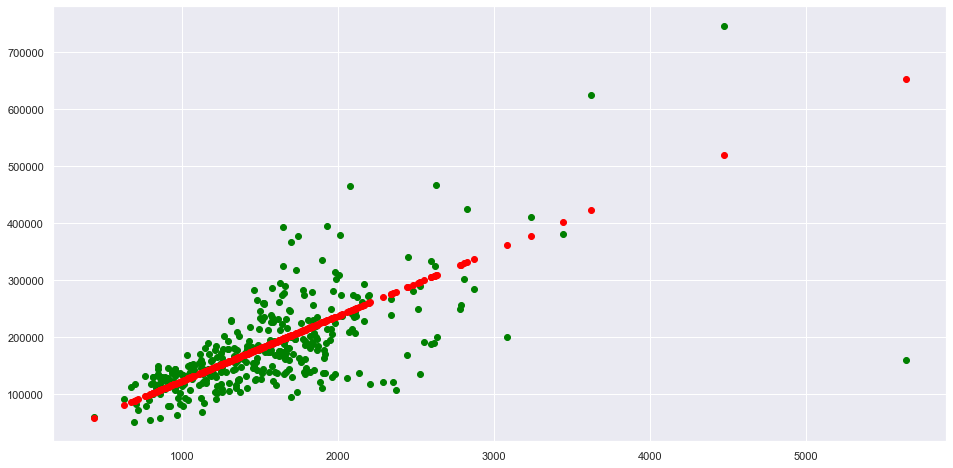

Explained Variance (R^2) 	: 0.40117720006925806
Mean Squared Error (MSE) 	: 3737081522.296089
Root Mean Squared Error (RMSE) 	: 61131.67364219705


In [12]:
# Predict SalePrice values corresponding to GrLivArea Test
SalePrice_test_pred = linreg_sp_gla.predict(GrLivArea_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(GrLivArea_test, SalePrice_test, color = "green")
plt.scatter(GrLivArea_test, SalePrice_test_pred, color = "red")
plt.show()

# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg_sp_gla.score(GrLivArea_test, SalePrice_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(SalePrice_test, SalePrice_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

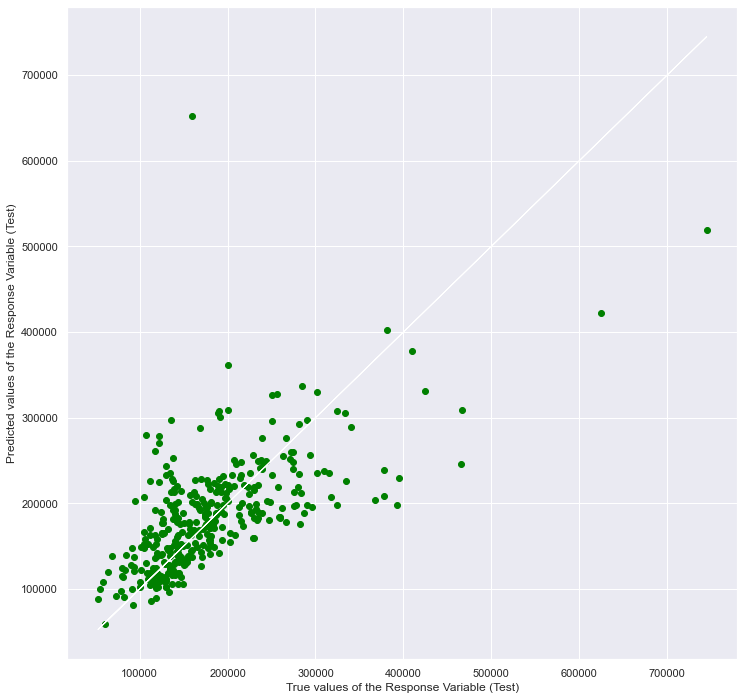

In [62]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(figsize=(12, 12))
axes.scatter(SalePrice_test, SalePrice_test_pred, color = "green")
axes.plot(SalePrice_test, SalePrice_test, 'w-', linewidth = 1)
axes.set_xlabel("True values of the Response Variable (Test)")
axes.set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Problem 2

#### 2a) Plot SalePrice against ” against each of the variables “LotArea”, “TotalBsmtSF”, “GarageArea” using any appropriate bivariate plot to note the strong linear relationship.

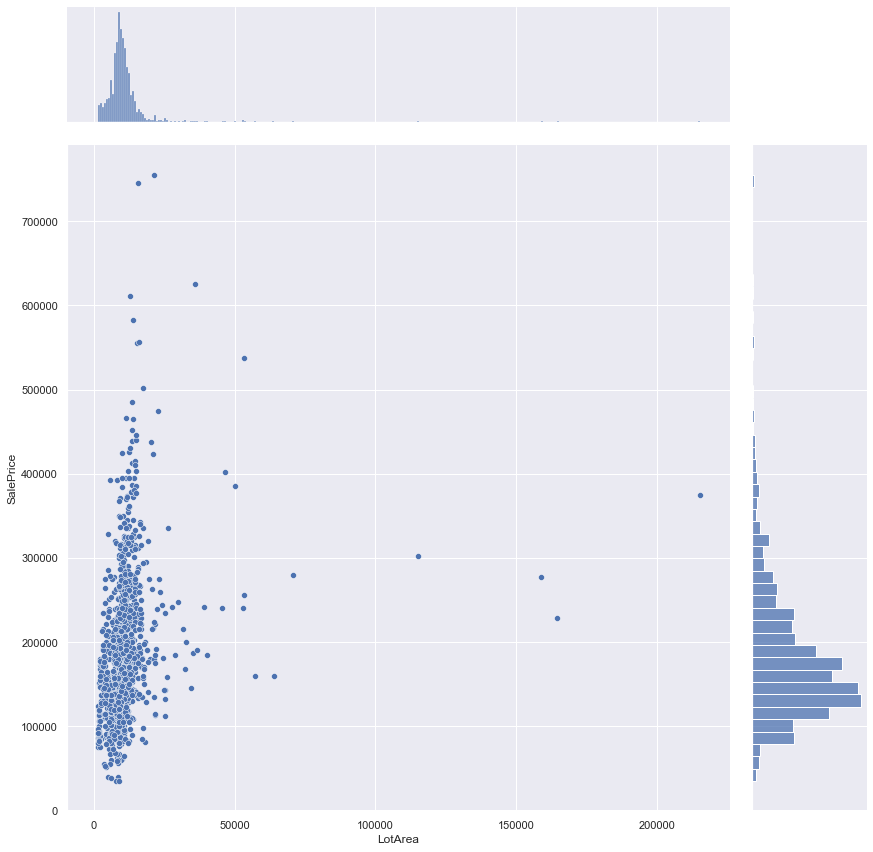

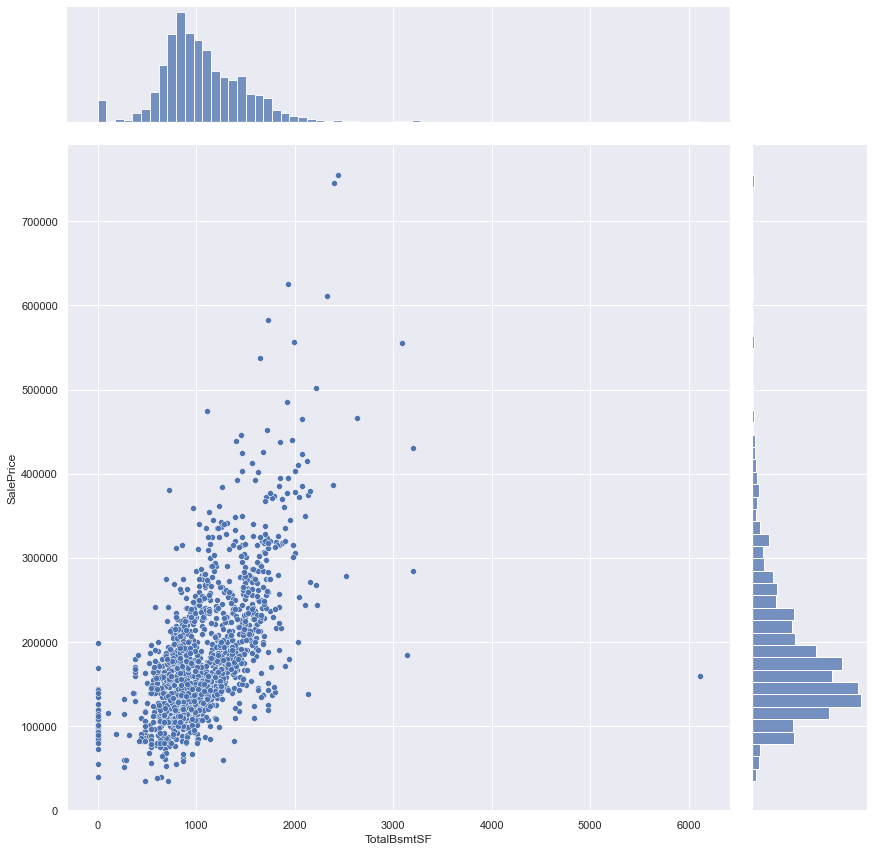

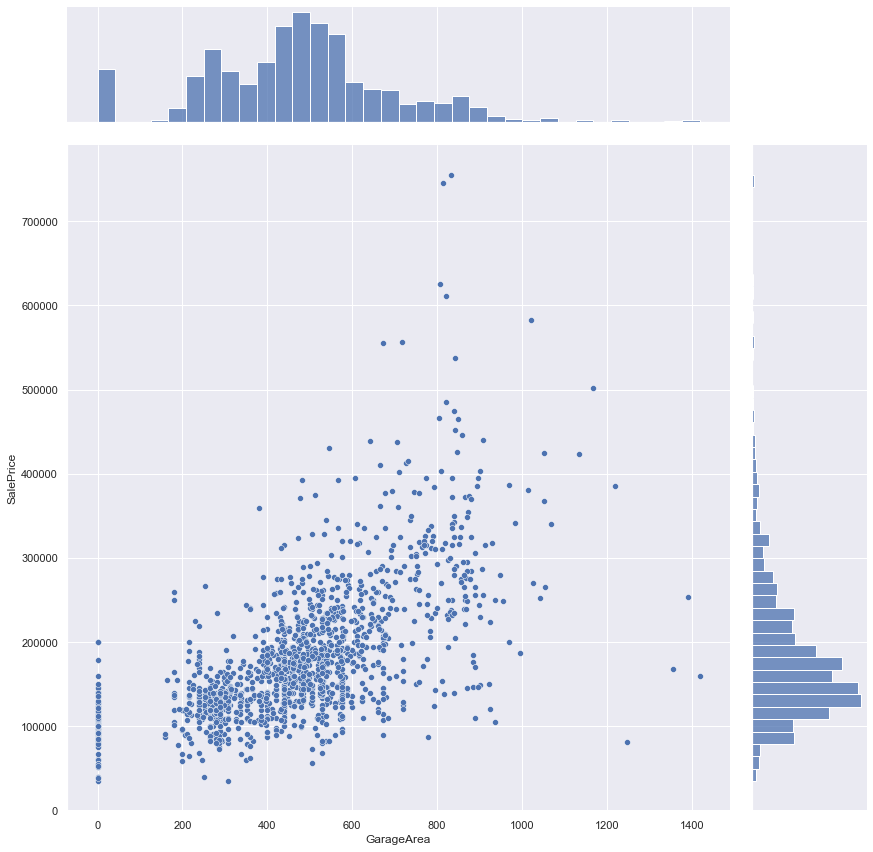

In [13]:
LotArea = pd.DataFrame(houseData['LotArea'])
TotalBsmtSF = pd.DataFrame(houseData['TotalBsmtSF'])
GarageArea = pd.DataFrame(houseData['GarageArea'])

# Create a joint dataframe by concatenating the two variables
jointDF1 = pd.concat([LotArea, SalePrice], axis = 1).reindex(LotArea.index)
sb.jointplot(data = jointDF1, x = "LotArea", y = "SalePrice", height = 12)

# Create a joint dataframe by concatenating the two variables
jointDF2 = pd.concat([TotalBsmtSF, SalePrice], axis = 1).reindex(TotalBsmtSF.index)
sb.jointplot(data = jointDF2, x = "TotalBsmtSF", y = "SalePrice", height = 12)

# Create a joint dataframe by concatenating the two variables
jointDF3 = pd.concat([GarageArea, SalePrice], axis = 1).reindex(GarageArea.index)
sb.jointplot(data = jointDF3, x = "GarageArea", y = "SalePrice", height = 12)

#### 2b) Print the correlation coefficient between these two variables to get a numerical evidence of the relationship.

In [14]:
print(jointDF1.corr())
print(jointDF2.corr())
print(jointDF3.corr())

            LotArea  SalePrice
LotArea    1.000000   0.263843
SalePrice  0.263843   1.000000
             TotalBsmtSF  SalePrice
TotalBsmtSF     1.000000   0.613581
SalePrice       0.613581   1.000000
            GarageArea  SalePrice
GarageArea    1.000000   0.623431
SalePrice     0.623431   1.000000


#### 2d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).

In [36]:
# Import LinearRegression model from Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
# Create a Linear Regression object for SalePrice against LotArea, TotalBsmtSF, GarageArea
linreg_sp_la = LinearRegression()
linreg_sp_tbsf = LinearRegression()
linreg_sp_ga = LinearRegression()

In [37]:
x = pd.DataFrame(houseData["LotArea"])
y = pd.DataFrame(houseData["SalePrice"])
a = pd.DataFrame(houseData["TotalBsmtSF"])
b = pd.DataFrame(houseData["GarageArea"])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split
# Train set: 1100 samples
# Split the Dataset into Train and Test
a_train, a_test, b_train, b_test, x_train, x_test, y_train, y_test = train_test_split( a, b, x, y, train_size = 1100)
print(x_train.shape)
print(y_train.shape)
print(a_train.shape)
print(b_train.shape)

print(x_test.shape)
print(y_test.shape)
print(a_test.shape)
print(b_test.shape)

(1100, 1)
(1100, 1)
(1100, 1)
(1100, 1)
(360, 1)
(360, 1)
(360, 1)
(360, 1)


#### 2e) Training : Fit a Linear Regression model on the Train Dataset to predict or estimate SalePrice using the variables

In [46]:
linreg_sp_la = LinearRegression()
linreg_sp_tbsf = LinearRegression()
linreg_sp_ga = LinearRegression()
linreg_sp_la.fit(x_train, y_train)
linreg_sp_tbsf.fit(a_train, y_train)
linreg_sp_ga.fit(b_train, y_train)


LinearRegression()

#### 2f) Print the coefficients of the Linear Regression model you just fit, and plot the regression line on a scatterplot.

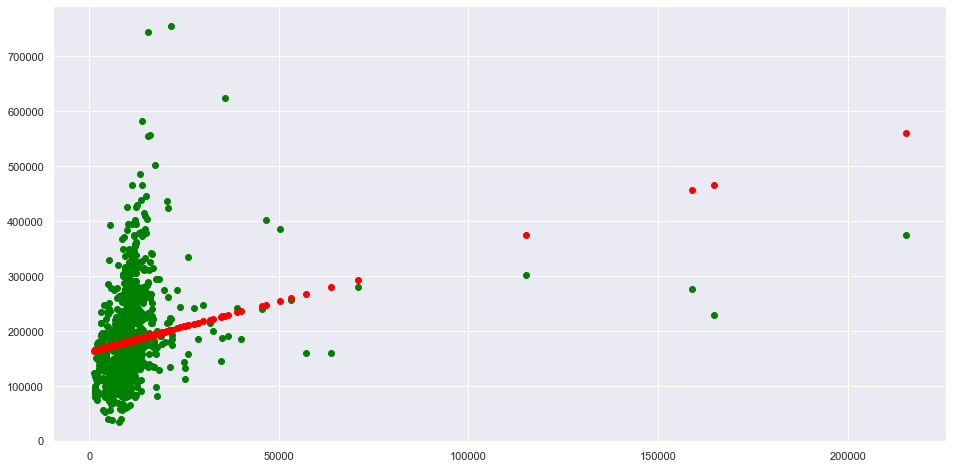

In [47]:
# For LotArea and SalePrice
# Predict SalePrice values corresponding to LotArea Train
y_train_pred = linreg_sp_la.predict(x_train)
# Plot the Predictions for LotArea and SalePrice
f = plt.figure(figsize=(16, 8))
plt.scatter(x_train, y_train, color = "green")
plt.scatter(x_train, y_train_pred, color = "red")
plt.show()

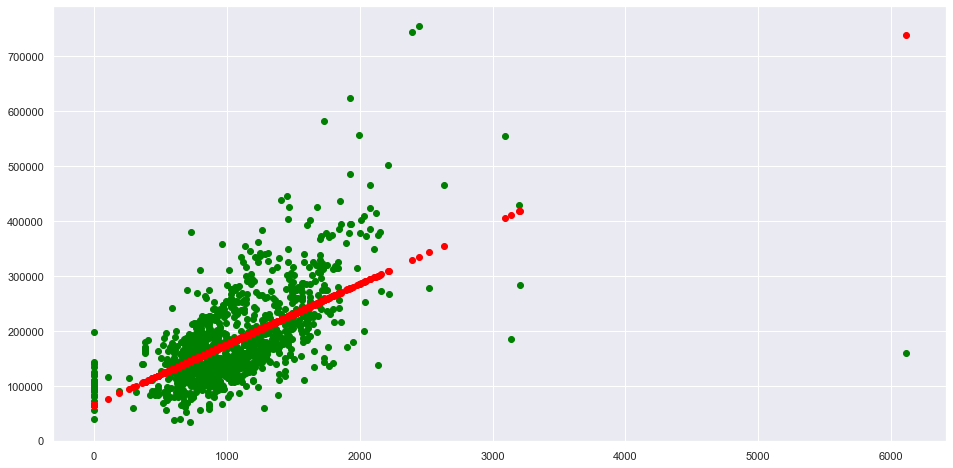

In [48]:
# For TotalBsmtSF and SalePrice
# Predict SalePrice values corresponding to TotalBsmtSF Train
y_train_pred = linreg_sp_tbsf.predict(a_train)
# Plot the Predictions for TotalBsmtSF and SalePrice
f = plt.figure(figsize=(16, 8))
plt.scatter(a_train, y_train, color = "green")
plt.scatter(a_train, y_train_pred, color = "red")
plt.show()

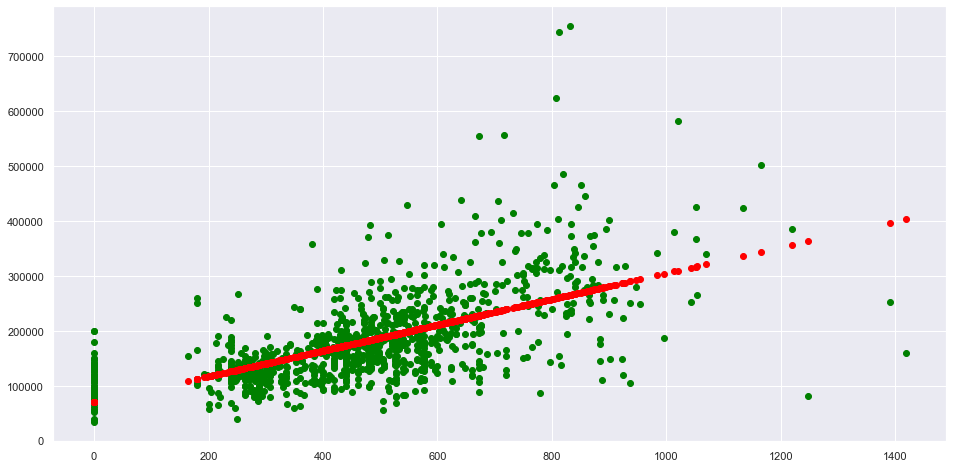

In [49]:
# For GarageArea and SalePrice
# Predict SalePrice values corresponding to GarageArea Train
y_train_pred = linreg_sp_ga.predict(b_train)
# Plot the Predictions for GarageArea and SalePrice
f = plt.figure(figsize=(16, 8))
plt.scatter(b_train, y_train, color = "green")
plt.scatter(b_train, y_train_pred, color = "red")
plt.show()

#### 2g) Print Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data to check Goodness of Fit of model.

#### 2h) Predict SalePrice in case of Test Data using the Linear Regression model and the predictor variables.

#### 2i) Plot the predictions on a Scatterplot of each variable and SalePrice in the Test Data to visualize model accuracy.

#### 2j) Print the Mean Squared Error (MSE) on Test Data to check Goodness of Fit of model, compared to the Training.

##### For SalePrice against LotArea

Intercept of Regression 	: b =  [161719.22269699]
Coefficients of Regression 	: a =  [[1.85124645]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.06457757405269782
Mean Squared Error (MSE) 	: 6125590654.406796
Root Mean Squared Error (MSE) 	: 78266.15267410809

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.08229933130454259
Mean Squared Error (MSE) 	: 5105180257.569804
Root Mean Squared Error (RMSE) 	: 71450.54413767473



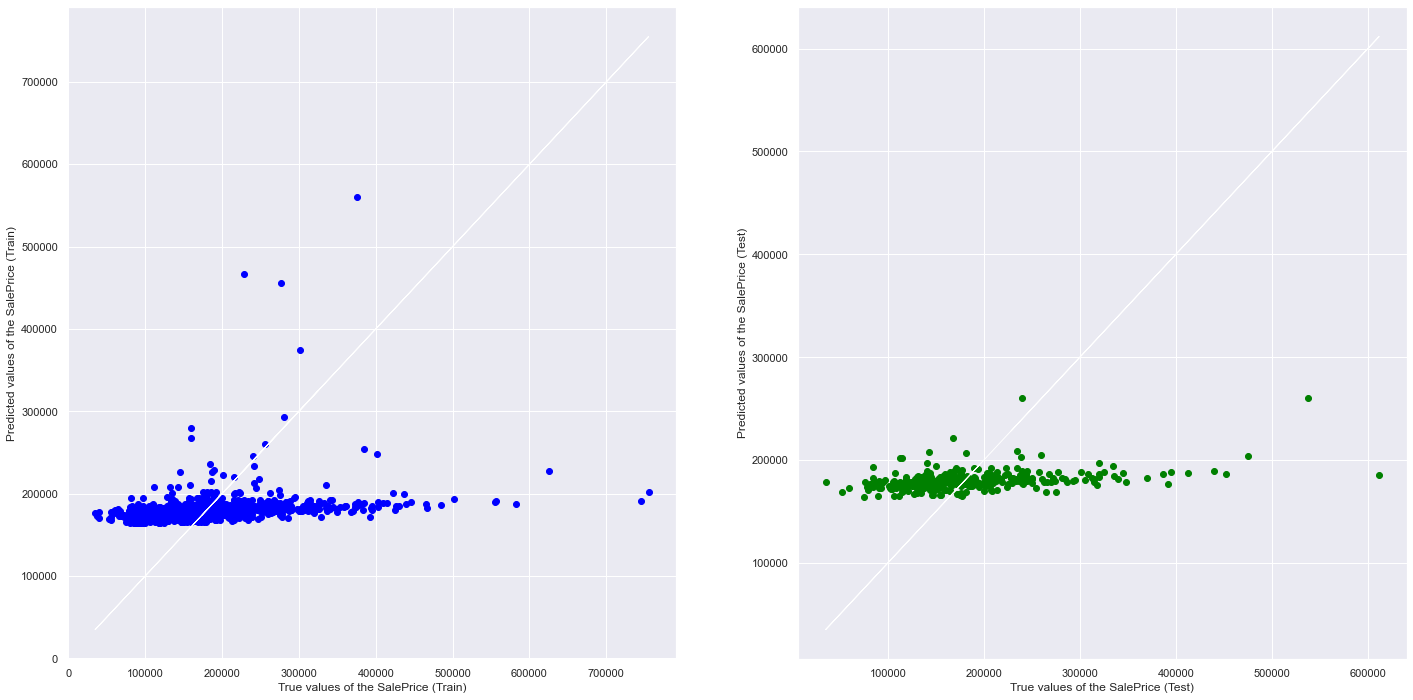

In [51]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_sp_la.intercept_)
print('Coefficients of Regression \t: a = ', linreg_sp_la.coef_)
print()

# Predict SalePrice values corresponding to LotArea
y_train_pred = linreg_sp_la.predict(x_train)
y_test_pred = linreg_sp_la.predict(x_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_sp_la.score(x_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (MSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg_sp_la.score(x_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the SalePrice (Train)")
axes[0].set_ylabel("Predicted values of the SalePrice (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the SalePrice (Test)")
axes[1].set_ylabel("Predicted values of the SalePrice (Test)")
plt.show()

##### For SalePrice against TotalBsmtSF

Intercept of Regression 	: b =  [65093.45126249]
Coefficients of Regression 	: a =  [[110.2950005]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.37949518564563145
Mean Squared Error (MSE) 	: 4063360452.33715
Root Mean Squared Error (MSE) 	: 63744.49350600529

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.36448581156019577
Mean Squared Error (MSE) 	: 3535373350.92109
Root Mean Squared Error (RMSE) 	: 59459.00563347062



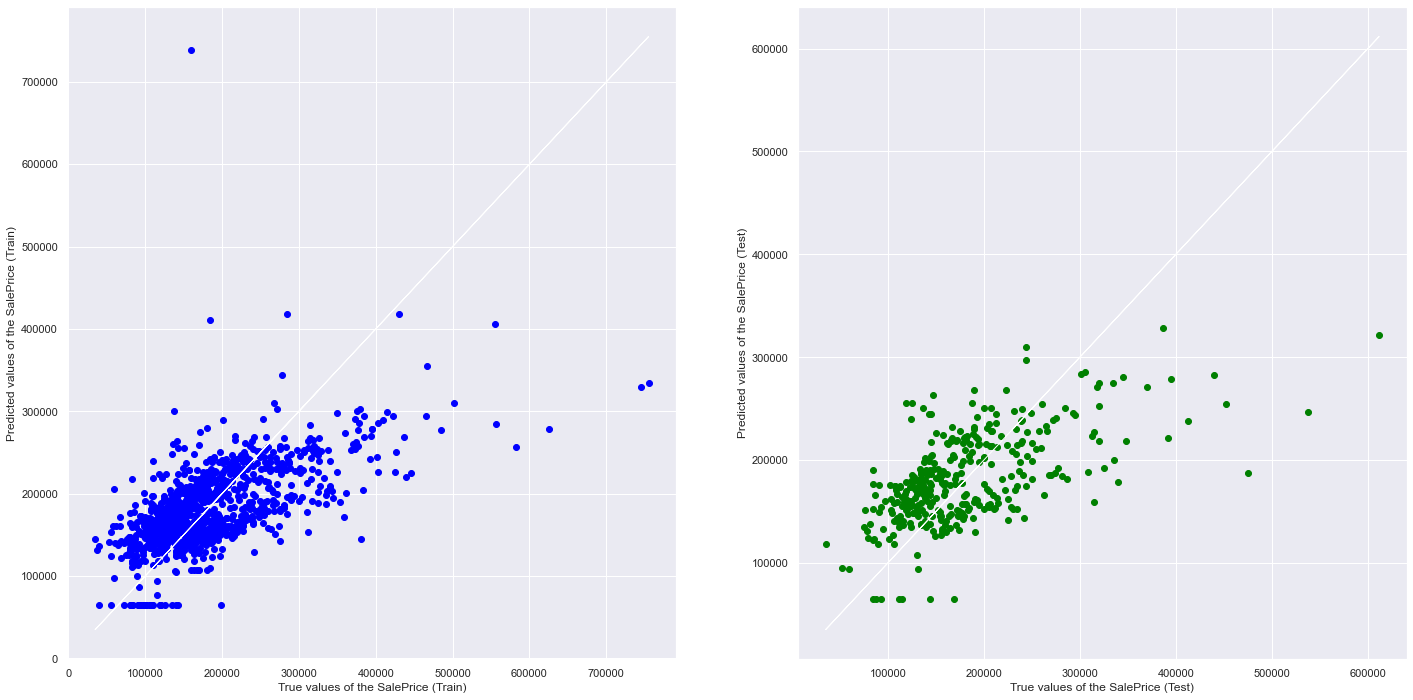

In [52]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_sp_tbsf.intercept_)
print('Coefficients of Regression \t: a = ', linreg_sp_tbsf.coef_)
print()

# Predict SalePrice values corresponding to TotalBsmtSF
y_train_pred = linreg_sp_tbsf.predict(a_train)
y_test_pred = linreg_sp_tbsf.predict(a_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_sp_tbsf.score(a_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (MSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg_sp_tbsf.score(a_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the SalePrice (Train)")
axes[0].set_ylabel("Predicted values of the SalePrice (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the SalePrice (Test)")
axes[1].set_ylabel("Predicted values of the SalePrice (Test)")
plt.show()

Intercept of Regression 	: b =  [69994.90200639]
Coefficients of Regression 	: a =  [[235.05331568]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.38529924602293675
Mean Squared Error (MSE) 	: 4025352706.2978897
Root Mean Squared Error (MSE) 	: 63445.66735639156

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3997659128355756
Mean Squared Error (MSE) 	: 3339109707.818197
Root Mean Squared Error (RMSE) 	: 57785.030135998



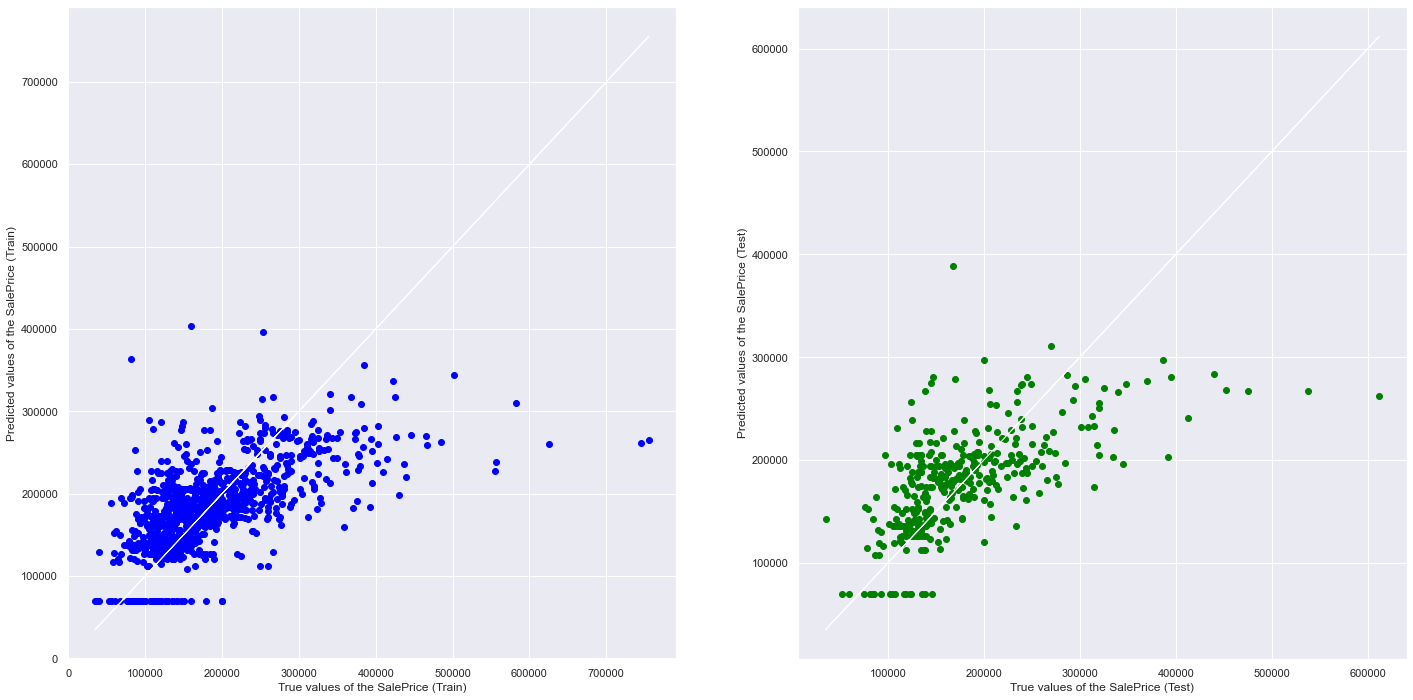

In [50]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg_sp_ga.intercept_)
print('Coefficients of Regression \t: a = ', linreg_sp_ga.coef_)
print()

# Predict SalePrice values corresponding to GarageArea
y_train_pred = linreg_sp_ga.predict(b_train)
y_test_pred = linreg_sp_ga.predict(b_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg_sp_ga.score(b_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print("Root Mean Squared Error (MSE) \t:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg_sp_ga.score(b_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the SalePrice (Train)")
axes[0].set_ylabel("Predicted values of the SalePrice (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the SalePrice (Test)")
axes[1].set_ylabel("Predicted values of the SalePrice (Test)")
plt.show()

# Problem 3
### Compare and contrast the four models in terms of Explained Variance (R^2) and Mean Squared Error (MSE) on Train Data, the accuracy of prediction on Test Data, and comment on which model you think is the best to predict “SalePrice”.

#### For GrLivArea Train set
- Explained Variance (R^2) 	: 0.5317704755454566
- Mean Squared Error (MSE) 	: 2962940662.7214036
- Root Mean Squared Error (RMSE) : 54432.90055399771
#### For GrLivArea Test set
- Explained Variance (R^2) 	: 0.40117720006925806
- Mean Squared Error (MSE) 	: 3737081522.296089
- Root Mean Squared Error (RMSE) 	: 61131.67364219705
#### For LotArea Train set
- Explained Variance (R^2) 	: 0.06457757405269782
- Mean Squared Error (MSE) 	: 6125590654.406796
- Root Mean Squared Error (MSE) 	: 78266.15267410809

#### For LotArea Test set
- Explained Variance (R^2) 	: 0.08229933130454259
- Mean Squared Error (MSE) 	: 5105180257.569804
- Root Mean Squared Error (RMSE) 	: 71450.54413767473

#### For TotalBsmtSF Train set
- Explained Variance (R^2) 	: 0.37949518564563145
- Mean Squared Error (MSE) 	: 4063360452.33715
- Root Mean Squared Error (MSE) 	: 63744.49350600529

#### For TotalBsmtSF Test set
- Explained Variance (R^2) 	: 0.36448581156019577
- Mean Squared Error (MSE) 	: 3535373350.92109
- Root Mean Squared Error (RMSE) 	: 59459.00563347062

#### For GarageArea Train set
- Explained Variance (R^2) 	: 0.38529924602293675
- Mean Squared Error (MSE) 	: 4025352706.2978897
- Root Mean Squared Error (MSE) 	: 63445.66735639156

#### For GarageArea Test set
- Explained Variance (R^2) 	: 0.3997659128355756
- Mean Squared Error (MSE) 	: 3339109707.818197
- Root Mean Squared Error (RMSE) 	: 57785.030135998

#### For GrLivArea :
- Highest Explained Variance (R^2), with values of 0.4-0.53
- Lowest Root Mean Square Error (RMSE), 54432 and 61131.
- Comparing the True values to predicted values, the graph looks quite linear for majority of the points, but there are still a significant amount of outliers as SalePrice increases.

#### For LotArea:
- Lowest Explained Variance (R^2), with values of 0.06-0.08
- Highest Root Mean Square Error (RMSE), 71450 and 78266.
- Comparing the true values with the predicted values, it is not linearly related and the points mainly cluster around SalePrice of 200000
- Linear Regression line also does not look very correlated

#### For TotalBsmtSF:
- Low Explained Variance (R^2) with values of 0.36-0.38
- Low Root Mean Square Error (RMSE)
- Compared to actual values, the predicted data looks most accurate with concentrated points at the middle among all the 4 models, but there are extreme anomalies in the data which could be better cleaned to improve accuracy for prediction.
- Linear Regression line looks moderately correlated

#### GarageArea:
- Both models consistently have a Explained Variance (R^2) range of 0.3-0.4 and Root Mean Square Error (RMSE) range of 60,000+
- However, GarageArea have a slightly lower RMSE than TotalBsmtSF of difference around 1,000
- Compared to the actual values, the scatter plot of the predicted data at the front does not seem to predict the values well, as the dots are more spread out. Low correlation.
- Linear Regression line looks quite correlated

##### I believe the best model to predict SalePrice would be TotalBsmtSF:
- The graph shows of actual values against predicted values, furthermore it has lowest explained variance
- One drawback would be the highest Root Mean Square Error due to the extreme anomalies, but if the anomalies are better cleaned, it could predict SalePrice best.